# Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Basics

You can draw a graph directly on plt (in the figure) or on the axes (coordinate system).<br>
If we write `plt.plot(x, np.sin(x))` then the figure (`figure`) and coordinate system (`axes`) are created in the background.

On a nootbook, the `plt.show()` command can be omitted by putting a semicolon after the last `plt` command

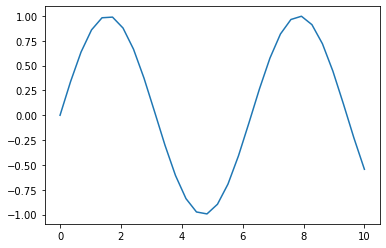

In [2]:
x = np.linspace(0, 10, 30)  #  [start, stop, num]
y = np.sin(x)

fig = plt.figure()
ax = plt.axes()              # not axis, but an axes !
ax.plot(x, y);

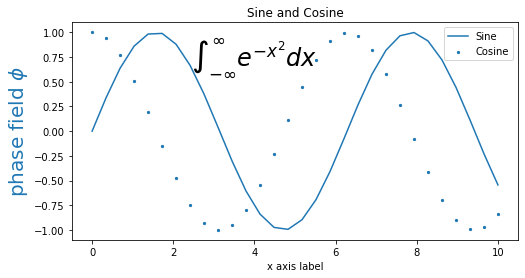

In [3]:
plt.figure(figsize=(8,4), facecolor ='w')  # facecolor better for copy plot
 
plt.plot    (x, np.sin(x))   
plt.scatter (x, np.cos(x), s=5)  
 
plt.xlabel('x axis label')  
plt.ylabel(r'phase field $\phi$', {'color': 'C0', 'fontsize': 20})
 
plt.title ('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
 
plt.text(4, 0.75, r'$\int^\infty_{-\infty}e^{-x^2}dx$', {'color': 'black', 'fontsize': 24,  'ha': 'center', 'va': 'center'})
 
plt.show()

Colors - in `'rgbcmyk`' short notation, in full `'blue'`, `'#FFDD44'`, RGB: `(1.0,0.2,0.3)` or grayscale: `'0.75'`<br>
Different kinds of markers

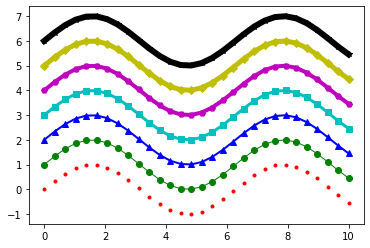

In [4]:
plt.figure()
marker = ".o^sHD*"
for i,c in enumerate("rgbcmyk"):
    plt.plot(x, y+i,   color=c, marker=marker[i], linewidth=i)

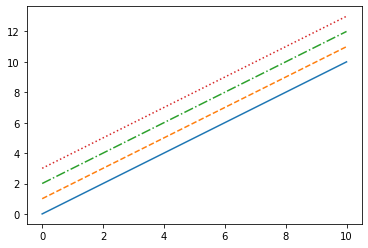

In [5]:
plt.figure()
for i, ls in enumerate(['-', '--', '-.', ':']):
    plt.plot(x, x + i, linestyle=ls)

Кратко стиль и цвет в одном параметре:

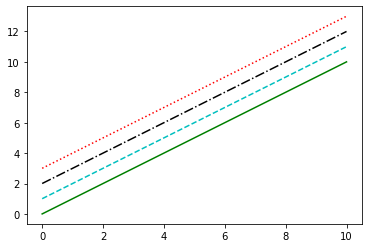

In [6]:
plt.figure()
plt.plot(x, x + 0, '-g')     
plt.plot(x, x + 1, '--c')    
plt.plot(x, x + 2, '-.k')    
plt.plot(x, x + 3, ':r');

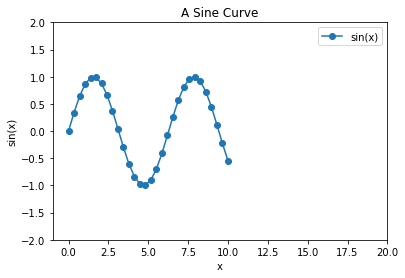

In [7]:
plt.figure()
plt.plot(x, y, "-o", label='sin(x)')  # then call plt.legend()
plt.axis([-1, 20, -2, 2]);            # plt.xlim(-1, 20);   plt.ylim(-2, 2); can be mirrored (2, -2)
plt.title("A Sine Curve") 
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()                          #  keeps track of line style and color
plt.show()

The commands `plt` and `ax` (object-oriented approach) are the same, except:
```
• plt.xlabel()  →  ax.set_xlabel()
• plt.ylabel()  →  ax.set_ylabel()
• plt.xlim()    →  ax.set_xlim()
• plt.ylim()    →  ax.set_ylim()
• plt.title()   →  ax.set_title()
```

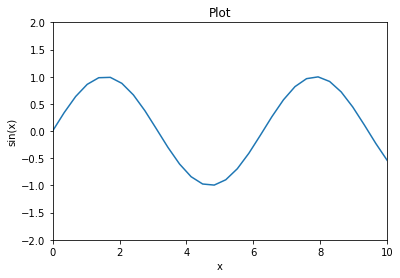

In [8]:
ax = plt.axes()
ax.plot(x, y)
ax.set(xlim=(0, 10), ylim=(-2, 2), xlabel='x', ylabel='sin(x)', title='Plot');

Marker types: `['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']` <br>
Can be combined with line type and color:

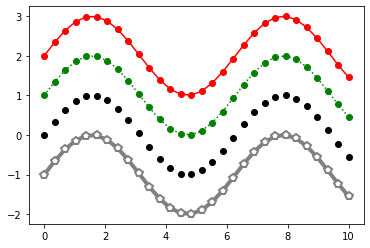

In [9]:
plt.figure()
plt.plot(x, y+2, marker='o', color='r')  # there is a line, we specify the marker
plt.plot(x, y+1, ':og')                  # dotted line, marker, color
plt.plot(x, y,   'o', color='black')     # no line
plt.plot(x, y-1, '-p', color='gray', markersize=8, linewidth=4,  markerfacecolor='white', markeredgecolor='gray', markeredgewidth=2)
plt.show()

## Scatterplot

Unlike `plot`, the `scatter` function can change the properties of each point (size, fill color, frame color, etc.).<br>
But `plot` can be much more efficient than `scatter` for a large number of points.

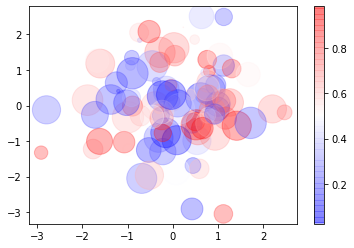

In [10]:
x, y = np.random.randn(100), np.random.randn(100)
colors = np.random.rand(100)
sizes = 1000 * np.random.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='bwr') # bwr,  viridis, seismic
plt.colorbar();  # Displaying the color scale

On a scatterplot, there are four different data dimensions simultaneously: (x, y)-coordinates of each point
(the length and width of the sepals), the size of the point is the width of the petals, the color is one of the three varieties of the flower (with 4 features).

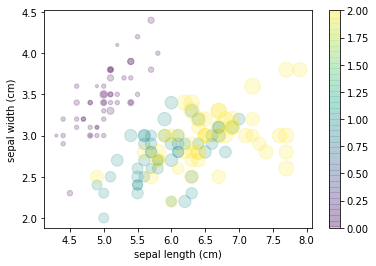

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T 

plt.scatter(features[0], features[1], alpha=0.2, s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar();

## Error Bars

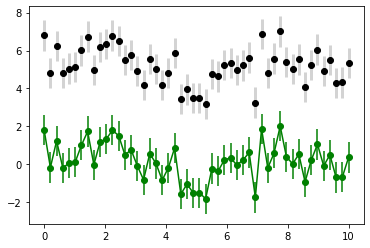

In [12]:
#plt.style.use('seaborn-whitegrid')

x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='-og')
plt.errorbar(x, y+5, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0);

The **regression algorithm based on the Gaussian process** near the measured data point, the model is strictly limited, in areas remote from the measured data point, the model is not strictly limited, and the errors of the model increase.

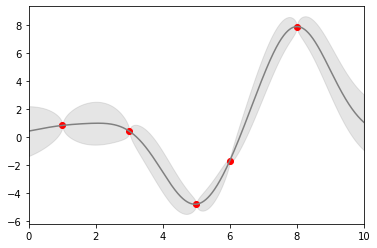

In [13]:
from sklearn.gaussian_process import GaussianProcessRegressor

model = lambda x: x * np.sin(x)                                # Describing the model and drawing some data
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

gp = GaussianProcessRegressor ()                               # Performing a Gaussian Process Fit
gp.fit(xdata[:, np.newaxis], ydata)
xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * np.sqrt(MSE)                                       # 2*sigma ~ 95% confidence area

plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
    
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=0.2)  # !!!!
plt.xlim(0, 10);

## Histograms

`Seaborn` provides an API on top of the Matplotlib library, providing reasonable plot style options, integrated with
the Pandas library (as opposed to `plt`).

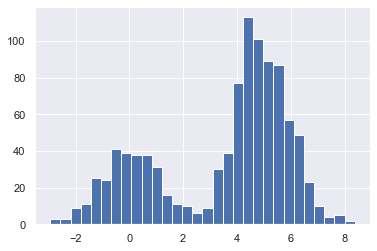

In [14]:
import seaborn as sns; sns.set()   # !!!!
    
def make_data(N, f=0.3, rseed=1):    
    x = np.random.randn(N)
    x[int(f * N):] += 5
    return x 
x = make_data(1000)    

hist = plt.hist(x, bins=30);

## Histograms with multiple coordinate systems

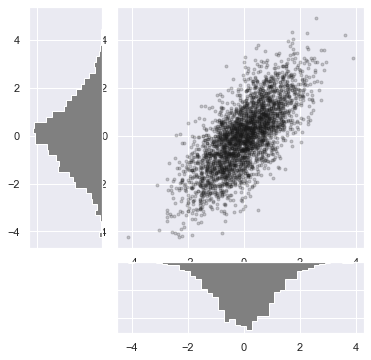

In [15]:
mean, cov = [0, 0],    [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T 

# Set coordinate systems using the GridSpec function
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist  = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist  = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# Distribute points according to the main coordinate system
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# Draw histograms on additional coordinate systems
x_hist.hist(x, 40, histtype='stepfilled',  orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',  orientation='horizontal', color='gray')
y_hist.invert_xaxis()        

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


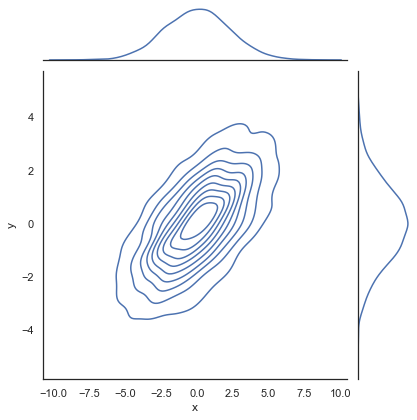

In [16]:
import pandas as pd
import seaborn as sns; sns.set()   # !!!!

data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]],  size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

In [29]:
import torch

x = torch.tensor([
    [[0,0,0],   
     [0,0,0]],
    
    [[1,2,3],   
     [3,4,5]],
    
    [[-1,-2,-3], 
     [-3,-4,-4]],
    
    [[1,1,1], 
     [1,1,1]],    
]).float()

x = torch.rand(4,8,8,3)


print(x.shape)
print(x.mean((1,2), keepdim=True).shape)

torch.Size([4, 8, 8, 3])
torch.Size([4, 1, 1, 3])
